## Project: Wrangling and Analyze Data

## Data Gathering
1. Downloaded the WeRateDogs Twitter archive data (twitter-archive-enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
import requests
import json


In [2]:
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
# Import the tweet image predictions TSV file into a DataFrame
images_df = pd.read_csv('image_predictions.tsv', sep = '\t')
response

<Response [200]>

In [4]:
images_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
images_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [6]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the requests library to query additional data via url provided in the Udacity classroom (tweet_json.txt)

In [7]:
# Download tweets using the Requests library and write it to tweet-json.txt
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)
with open('tweet-json.txt', mode='wb') as file:
    file.write(response.content)


In [8]:
with open('tweet-json.txt') as json_f:
    tweets_df = pd.DataFrame(columns = ['tweet_id','favorites','retweets'])
    
    for info in json_f:
        tweets = json.loads(info)
        data = {'tweet_id': tweets['id'],'favorites': tweets['favorite_count'],
                                      'retweets': tweets['retweet_count']}
        ser = pd.Series(data)
        tweets_df = tweets_df.append(data,ignore_index=True)
tweets_df.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data

In [9]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
twitter_df.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_r

In [11]:
twitter_df.expanded_urls.isnull().sum()

59

In [12]:
twitter_df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [13]:
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
twitter_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
twitter_df.tweet_id.duplicated().sum()

0

In [16]:
twitter_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [17]:
twitter_df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

### Quality issues
1. Timestamp should be Datetime not object


2. Nulls represented as (none) in name column


3.  Year,month day in one column(timestamp)


4. Retweet should be removed since only tweet is needed


5. missing values in name and expanded_urls columns


6. Mixed upper and lower case in P_1 and P_2 columns of images_df


7. tweet_id should be object not int


8. Irrelevant columns in the dataset

### Tidiness issues
1. doggo, floofer, pupper, and puppo should be in one column not 4..........


2. The three dataset should be merged into one not separate.............

## Cleaning Data

In [18]:
# Make copies of original pieces of data
clean_twitter = twitter_df.copy()
clean_images = images_df.copy()
clean_tweets = tweets_df.copy()


### Issue #1: The three dataset should be merged into one not separate.

### Define:  Merging tables with merge method

#### Code

In [19]:
clean_twitter_archive = pd.merge(clean_twitter, clean_images, on='tweet_id',how ='left')
clean_twitter_archive = pd.merge(clean_twitter_archive, clean_tweets, on='tweet_id', how='left')

#### Test

In [20]:
clean_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774


### Issue #2:  tweet_id should be object not int.

### Define: converting tweet-id from int to string using astype method

### Code

In [21]:
clean_twitter_archive['tweet_id'] = clean_twitter_archive['tweet_id'].astype(str)

### Test

In [22]:
type(clean_twitter_archive['tweet_id'][0])

str

### Issue #3: Timestamp should be Datetime not object.

### Define: converting timestamp column to datetime.

### Code

In [23]:
clean_twitter_archive['timestamp'] = pd.to_datetime(clean_twitter_archive['timestamp'])

### Test

In [24]:
type(clean_twitter_archive['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

### Issue #4: Retweet should be removed since only tweet is needed.

### Define: drop retweet column using drop method.

### Code

In [25]:
clean_twitter_archive = clean_twitter_archive.drop(columns= ['retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'],axis=1)

### Test

In [26]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2356 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2356 non-null   datetime64[ns, UTC]
 4   source                 2356 non-null   object             
 5   text                   2356 non-null   object             
 6   expanded_urls          2297 non-null   object             
 7   rating_numerator       2356 non-null   int64              
 8   rating_denominator     2356 non-null   int64              
 9   name                   2356 non-null   object             
 10  doggo                  2356 non-null   object             
 11  floofer                2356 non-null   object           

### Issue #5: doggo, floofer, pupper, and puppo should be in one column not 4.

### Define: extract doggo,floofer, pupper and puppo and put into one column

### Code

In [30]:
clean_twitter_archive['Dog_type'] = clean_twitter_archive['text'].str.extract('(doggo|floofer|pupper|puppo)')

clean_twitter_archive = clean_twitter_archive.drop(columns=['doggo','floofer','pupper','puppo'])

### Test

In [31]:
clean_twitter_archive['Dog_type'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: Dog_type, dtype: int64

In [32]:
clean_twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

### Issue #6: Nulls represented as (none) in name column.

### Define: replace with nulls with numpy nan

### Code

In [33]:
clean_twitter_archive.name = clean_twitter_archive.name.replace('None',value=np.nan)

### Test

In [34]:
clean_twitter_archive.name.isnull().sum()

745

### Issue #7: Mixed upper and lower case in P_1,P_2 and P_3 columns.


### Define: Make the first letters capital using str.title

### Code

In [35]:
clean_twitter_archive.p1 = clean_twitter_archive.p1.str.title()
clean_twitter_archive.p2 = clean_twitter_archive.p2.str.title()
clean_twitter_archive.p3 = clean_twitter_archive.p3.str.title()

### Test

In [36]:
clean_twitter_archive[['p1','p2','p3']]

,p1,p2,p3
0,Orange,Bagel,Banana
1,Chihuahua,Pekinese,Papillon
2,Chihuahua,Malamute,Kelpie
3,Paper_Towel,Labrador_Retriever,Spatula
4,Basset,English_Springer,German_Short-Haired_Pointer
...,...,...,...
2351,Miniature_Pinscher,Rottweiler,Doberman
2352,Rhodesian_Ridgeback,Redbone,Miniature_Pinscher
2353,German_Shepherd,Malinois,Bloodhound
2354,Redbone,Miniature_Pinscher,Rhodesian_Ridgeback


### Issue #8: Year,month day in one column(timestamp)

### Define: Split timestamp into day - month - year (3 columns)

### Code

In [38]:
#extract year, month and day to new columns
clean_twitter_archive['year'] = clean_twitter_archive['timestamp'].dt.year
clean_twitter_archive['month'] = clean_twitter_archive['timestamp'].dt.month
clean_twitter_archive['day'] = clean_twitter_archive['timestamp'].dt.day

#Finally drop timestamp column
clean_twitter_archive = clean_twitter_archive.drop('timestamp', 1)

C:\Users\udobo\AppData\Local\Temp/ipykernel_13516/278853849.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  clean_twitter_archive = clean_twitter_archive.drop('timestamp', 1)


### Test

In [39]:
clean_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,...,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,Dog_type,year,month,day
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,Banana,0.076110,False,39467,8853,NaN,2017,8,1
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Papillon,0.068957,True,33819,6514,NaN,2017,8,1
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,Kelpie,0.031379,True,25461,4328,NaN,2017,7,31
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,True,Spatula,0.040836,False,42908,8964,NaN,2017,7,30
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,German_Short-Haired_Pointer,0.175219,True,41048,9774,NaN,2017,7,29


### Issue #9: Missing values in name and expanded_urls column

### Define: Drop null values using dropna method

### Code

In [42]:
clean_twitter_archive = clean_twitter_archive.dropna(subset=['name','expanded_urls'])

### Test

In [43]:
clean_twitter_archive.name.isnull().sum()

0

In [45]:
clean_twitter_archive['expanded_urls'].isnull().sum()

0

### Issue #10: irrelevant columns in the dataset

### Define: drop irrelevant columns in the dataset using drop method

### Code

In [46]:
clean_twitter_archive = clean_twitter_archive.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'source'],axis=1)

### Test

In [47]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 0 to 2354
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1611 non-null   object 
 1   text                1611 non-null   object 
 2   expanded_urls       1611 non-null   object 
 3   rating_numerator    1611 non-null   int64  
 4   rating_denominator  1611 non-null   int64  
 5   name                1611 non-null   object 
 6   jpg_url             1497 non-null   object 
 7   img_num             1497 non-null   float64
 8   p1                  1497 non-null   object 
 9   p1_conf             1497 non-null   float64
 10  p1_dog              1497 non-null   object 
 11  p2                  1497 non-null   object 
 12  p2_conf             1497 non-null   float64
 13  p2_dog              1497 non-null   object 
 14  p3                  1497 non-null   object 
 15  p3_conf             1497 non-null   float64
 16  p3_dog

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [52]:
clean_twitter_archive.to_csv("twitter_archive_master.csv",index=False)

## Analyzing and Visualizing Data

In [51]:
clean_twitter_archive.head(5)

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,...,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,Dog_type,year,month,day
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,...,False,Banana,0.076110,False,39467,8853,NaN,2017,8,1
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,...,True,Papillon,0.068957,True,33819,6514,NaN,2017,8,1
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,...,True,Kelpie,0.031379,True,25461,4328,NaN,2017,7,31
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper_Towel,0.170278,...,True,Spatula,0.040836,False,42908,8964,NaN,2017,7,30
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,...,True,German_Short-Haired_Pointer,0.175219,True,41048,9774,NaN,2017,7,29


<BarContainer object of 4 artists>

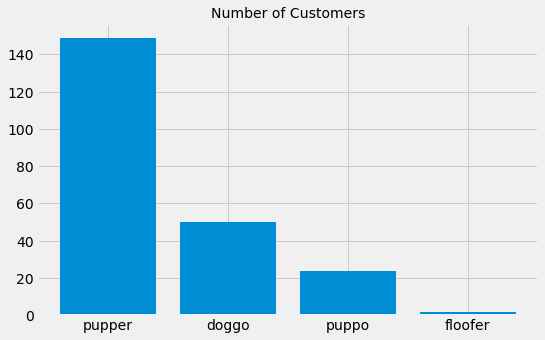

In [53]:
plt.figure(figsize=(8,5))
plt.title("Number of Customers", fontsize=14)
plt.bar(x=clean_twitter_archive['Dog_type'].value_counts().index,
        height=clean_twitter_archive.Dog_type.value_counts().values)

### Insights:
1. pupper is the Most Popular stage

2. floofer is the least popular stage